In [1]:
import pandas as pd
import plotly.graph_objects as go

items = ['Fever Tree Soda'] + ['Asahi Pint'] * 11 + ['Chenin Blanc Bottle'] * 2 + ['Half Chenin Blanc Bottle'] * 2 + ['Tasting Menu'] * 6 + ['Kimchi Hot Stone Rice'] * 2 + ['Salmon Bun'] * 2 + ['Fever Tree Lemonade'] + ['Yuzu Padron Pepers'] + ['Service Charge'] * 8
category = ['Drink'] + ['Drink'] * 11 + ['Drink'] * 2 + ['Drink'] * 2 + ['Food'] * 6 + ['Food'] * 2 + ['Food'] * 2 + ['Drink'] + ['Food'] + ['Additional Tax'] * 8
cost = [3.0] + [6.0] * 11 + [19.75] * 2 + [9.87] * 2 + [37.5] * 6 + [9.75] * 2 + [6.5] * 2 + [2.75] + [5.75] + [7.04] * 8
owner = ['Max', 'Jon', 'Jon', 'Jon', 'Jon', 'Oliver', 'Oliver', 'Oliver', 'Oliver', 'Lauren', 'Jason', 'Jason',
         'Ausra', 'Lauren', 'Jenny', 'John', 'Oliver', 'Ausra', 'Jon', 'Lauren', 'Jason', 'Max', 'Jenny', 'John', 'Jenny',
         'John', 'Max', 'Jenny', 'Oliver', 'Ausra', 'Jon', 'Lauren', 'Jenny', 'John', 'Max', 'Jason']

df = pd.DataFrame({
    'item': items,
    'category': category,
    'owner': owner,
    'cost': cost
})

labels = list(df.owner.unique()) + list(df.category.unique()) + list(df.item.unique())
l_1 = df.groupby(['owner', 'item']).sum()
l_2 = df.groupby(['item', 'category']).sum()

source, target, value = [], [], []
for row in l_1.to_records():
    source.append(labels.index(row[0]))
    target.append(labels.index(row[1]))
    value.append(row[2])
    
for row in l_2.to_records():
    source.append(labels.index(row[0]))
    target.append(labels.index(row[1]))
    value.append(row[2])
    
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels
    ),
    link = dict(
      source = source,
      target = target,
      value  = value
    ))])

In [2]:
df.groupby(['owner']).agg({
    'item': ['count'],
    'cost': ['sum']
})

,item,cost
,count,sum
owner,,
Ausra,3,64.29
Jason,4,56.54
Jenny,5,38.91
John,4,33.16
Jon,6,68.54
Lauren,4,70.29
Max,4,50.29
Oliver,6,68.54


In [3]:
df.groupby(['owner', 'item']).agg({
    'item': ['count'],
    'cost': ['sum']
})

item   cost
                                count    sum
owner  item                                 
Ausra  Chenin Blanc Bottle          1  19.75
       Service Charge               1   7.04
       Tasting Menu                 1  37.50
Jason  Asahi Pint                   2  12.00
       Service Charge               1   7.04
       Tasting Menu                 1  37.50
Jenny  Half Chenin Blanc Bottle     1   9.87
       Kimchi Hot Stone Rice        1   9.75
       Salmon Bun                   1   6.50
       Service Charge               1   7.04
       Yuzu Padron Pepers           1   5.75
John   Half Chenin Blanc Bottle     1   9.87
       Kimchi Hot Stone Rice        1   9.75
       Salmon Bun                   1   6.50
       Service Charge               1   7.04
Jon    Asahi Pint                   4  24.00
       Service Charge               1   7.04
       Tasting Menu                 1  37.50
Lauren Asahi Pint                   1   6.00
       Chenin Blanc Bottle          1  19.75
       Service Charge               1   7.04
       Tasting Menu                 1  37.50
Max    Fever Tree Lemonade          1   2.75
       Fever Tree Soda              1   3.00
       Service Charge               1   7.04
       Tasting Menu                 1  37.50
Oliver Asahi Pint                   4  24.00
       Service Charge               1   7.04
       Tasting Menu                 1  37.50

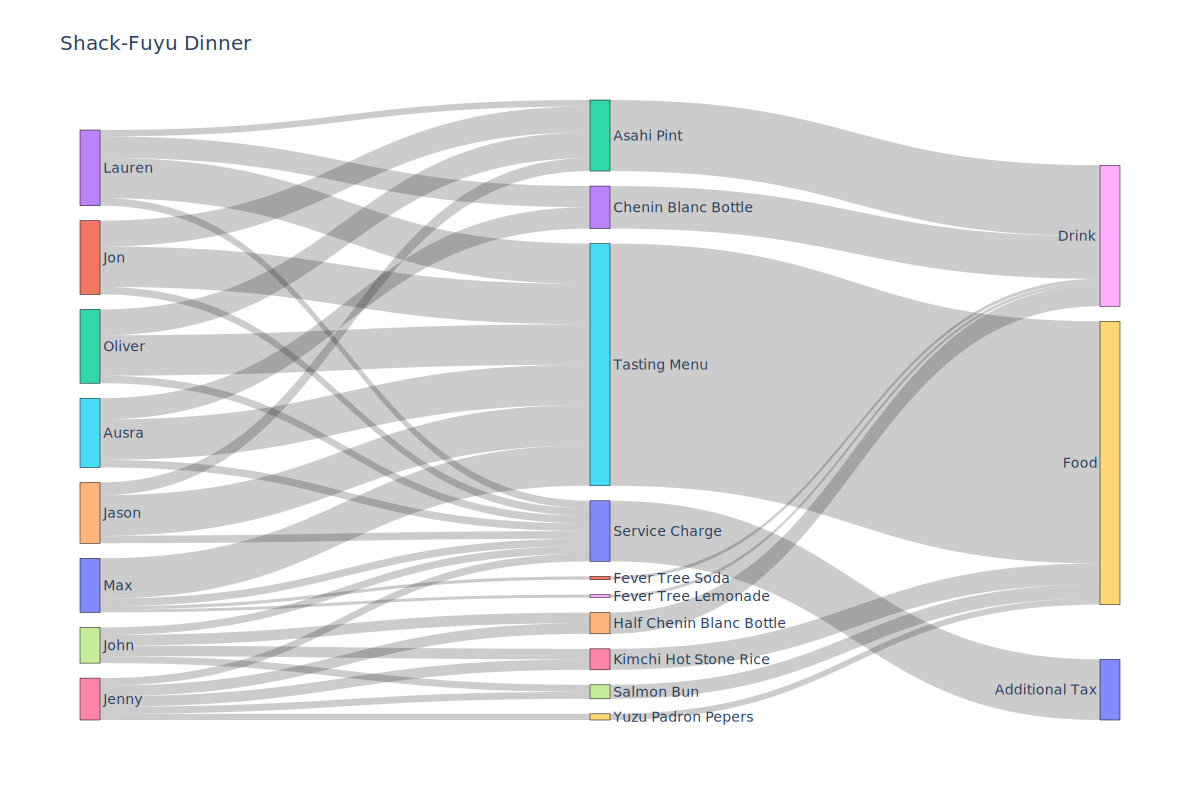

In [14]:
fig.update_layout(title_text="Shack-Fuyu Dinner", font_size=14, width=1200)
fig.show(renderer="svg")

<img src="original_f30c0853-881c-443b-b3b2-1b989370f020_PXL_20220302_224355416.jpg" alt="Drawing" style="width: 600px;"/>